## Train a machine learning model

Azure Machine Learning includes an automated machine learning capability that automatically tries multiple pre-processing techniques and model-training algorithms in parallel. [Azure Machine Learning, birden çok ön işleme tekniğini ve model eğitimi algoritmasını paralel olarak otomatik olarak deneyen otomatik bir makine öğrenimi özelliği içerir.] These automated capabilities use the power of cloud compute to find the best performing supervised machine learning model for your data. [Bu otomatikleştirilmiş yetenekler, verileriniz için en iyi performans gösteren denetimli makine öğrenimi modelini bulmak için bulut bilişimin gücünü kullanır.]

**Note**

The automated machine learning capability in Azure Machine Learning supports supervised machine learning models - in other words, models for which the training data includes known label values. [Azure Machine Learning'deki otomatik makine öğrenimi özelliği, denetimli makine öğrenimi modellerini, diğer bir deyişle, eğitim verilerinin bilinen etiket değerlerini içerdiği modelleri destekler.] You can use automated machine learning to train models for: [Aşağıdakiler için modelleri eğitmek için otomatik makine öğrenimini kullanabilirsiniz:]

- **Classification** (predicting categories or classes) [Sınıflandırma (kategorileri veya sınıfları tahmin etme)]

- **Regression** (predicting numeric values) [Regresyon (sayısal değerleri tahmin etme)]

- **Time series** forecasting (predicting numeric values at a future point in time) [Zaman serisi tahmini (zamanın gelecekteki bir noktasında sayısal değerleri tahmin etme)]

### Run an automated machine learning experiment

In Azure Machine Learning, operations that you run are called experiments. [Azure Machine Learning'de çalıştırdığınız işlemlere deneme adı verilir.] Follow the steps to run an experiment that uses automated machine learning to train a regression model that predicts bicycle rentals. [Bisiklet kiralamalarını tahmin eden bir regresyon modelini eğitmek için otomatik makine öğrenimini kullanan bir deneyi çalıştırmak için adımları izleyin.]

1. In Azure Machine Learning studio, view the **Automated ML** page (under **Author**). [Azure Machine Learning stüdyosunda, Otomatik ML sayfasını görüntüleyin (Yazar altında).]

2. Create an Automated ML run with the following settings: [Aşağıdaki ayarlarla bir Otomatik ML çalıştırması oluşturun:]

    - **Select dataset**: [Veri kümesini seçin:]

        - **Dataset**: bike-rentals [Veri kümesi: bisiklet kiralama]
    
    - **Configure run**: [Çalıştırmayı yapılandır:]

        - **New experiment name**: mslearn-bike-rental [Yeni deneme adı: mslearn-bisiklet kiralama]

        - **Target column**: rentals (this is the label that the model is trained to predict) [Hedef sütun: kiralamalar (bu, modelin tahmin etmek için eğitildiği etikettir)]

        - **Select compute cluster**: the compute cluster that you created previously [İşlem kümesini seçin: daha önce oluşturduğunuz işlem kümesi]

    - **Select task and settings**: [Görev ve ayarları seçin:]

        - **Task type**: Regression (the model predicts a numeric value) [Görev türü: Regresyon (model sayısal bir değer öngörür)]
    
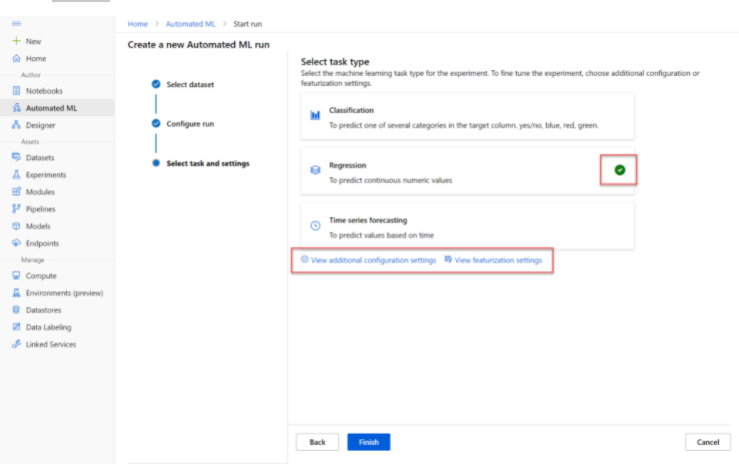

Notice under task type there are settings View additional configuration settings and View Featurization settings. [Görev türü altında, Ek yapılandırma ayarlarını görüntüle ve Özelliklendirme ayarlarını görüntüle ayarları vardır.] Now configure these settings. [Şimdi bu ayarları yapılandırın.]

- **Additional configuration settings**: [Ek yapılandırma ayarları:]

    - **Primary metric**: Select Normalized root mean squared error (more about this metric later!) [Birincil metrik: Normalleştirilmiş hata karesi kökünü seçin (bu metrik hakkında daha sonra daha fazla bilgi edinin!)]

    - **Explain best model**: Selected — this option causes automated machine learning to calculate feature importance for the best model which makes it possible to determine the influence of each feature on the predicted label. [En iyi modeli açıkla: Seçili — bu seçenek, otomatikleştirilmiş makine öğreniminin en iyi model için özellik önemini hesaplamasına neden olur ve bu da her özelliğin tahmin edilen etiket üzerindeki etkisini belirlemeyi mümkün kılar.]

    - **Use all supported models**: Unselected. [Desteklenen tüm modelleri kullan: Seçili değil.] You'll restrict the experiment to try only a few specific algorithms. [Deneyi yalnızca birkaç belirli algoritmayı deneyecek şekilde kısıtlayacaksınız.]

    - **Allowed models**: Select only RandomForest and LightGBM — normally you'd want to try as many as possible, but each model added increases the time it takes to run the experiment. [İzin verilen modeller: Yalnızca RandomForest ve LightGBM'yi seçin - normalde mümkün olduğunca çok sayıda denemek istersiniz, ancak eklenen her model denemeyi çalıştırmak için gereken süreyi artırır.]

    - **Exit criterion**: [Çıkış kriteri:]

        - **Training job time (hours)**: 0.5 — ends the experiment after a maximum of 30 minutes. [Eğitim işi süresi (saat): 0,5 — maksimum 30 dakika sonra deneyi bitirir.]

        - **Metric score threshold**: 0.085 — if a model achieves a normalized root mean squared error metric score of 0.08 or less, the experiment ends. [Metrik puan eşiği: 0,085 — bir model 0,08 veya daha düşük bir normalleştirilmiş ortalama karesel hata metrik puanına ulaşırsa, deney sona erer.]

    - **Concurrency**: do not change [Eşzamanlılık: değiştirme]

- **Featurization settings**: [Özellik ayarları:]

    - **Enable featurization**: Selected — automatically preprocess the features before training. [Özelliği etkinleştir: Seçili — eğitimden önce özellikleri otomatik olarak ön işleme tabi tutun.]

Click **Next** to go to the next selection pane. [Sonraki seçim bölmesine gitmek için İleri'ye tıklayın.]

- **[Optional] Select the validation and test type** [[İsteğe bağlı] Doğrulama ve test türünü seçin]

    - **Validation type**: Auto [Doğrulama türü: Otomatik]

    - **Test dataset (preview)**: No test dataset required [Test veri seti (önizleme): Test veri seti gerekmez]

3. When you finish submitting the automated ML run details, it starts automatically. [Otomatik makine öğrenimi çalıştırma ayrıntılarını göndermeyi tamamladığınızda, otomatik olarak başlar.] Wait for the run status to change from Preparing to Running. [Çalıştırma durumunun Hazırlanıyor'dan Çalışıyor'a değişmesini bekleyin.]

4. When the run status changes to Running, view the **Models** tab and observe as each possible combination of training algorithm and pre-processing steps is tried and the performance of the resulting model is evaluated. [Çalıştırma durumu Çalışıyor olarak değiştiğinde, Modeller sekmesini görüntüleyin ve eğitim algoritması ve ön işleme adımlarının olası her bir kombinasyonu denenip elde edilen modelin performansı değerlendirilirken gözlemleyin.] The page automatically refreshes periodically, but you can also select **↻ Refresh**. [Sayfa düzenli aralıklarla otomatik olarak yenilenir, ancak ↻ Yenile'yi de seçebilirsiniz.] It might take 10 minutes or so before models start to appear, as the cluster nodes must be initialized before training can begin. [Eğitim başlamadan önce küme düğümlerinin başlatılması gerektiğinden, modellerin görünmeye başlaması 10 dakika kadar sürebilir.]

5. Wait for the experiment to finish. [Deneyin bitmesini bekleyin.] It might take a while — now might be a good time for a coffee break! [Biraz zaman alabilir - şimdi bir kahve molası için iyi bir zaman olabilir!]

### Review the best model 

After the experiment has finished you can review the best performing model. [Deneme bittikten sonra en iyi performans gösteren modeli inceleyebilirsiniz.] In this case, you used exit criteria to stop the experiment. [Bu durumda, denemeyi durdurmak için çıkış kriterlerini kullandınız.] Thus the "best" model the experiment generated might not be the best possible model, just the best one found within the time allowed for this exercise. [Bu nedenle, deneyin oluşturduğu 'en iyi' model, mümkün olan en iyi model olmayabilir, yalnızca bu alıştırma için izin verilen süre içinde bulunan en iyi model olabilir.]

1. On the **Details** tab of the automated machine learning run, note the best model summary. [Otomatik makine öğrenimi çalıştırmasının Ayrıntılar sekmesinde en iyi model özetini not edin.]

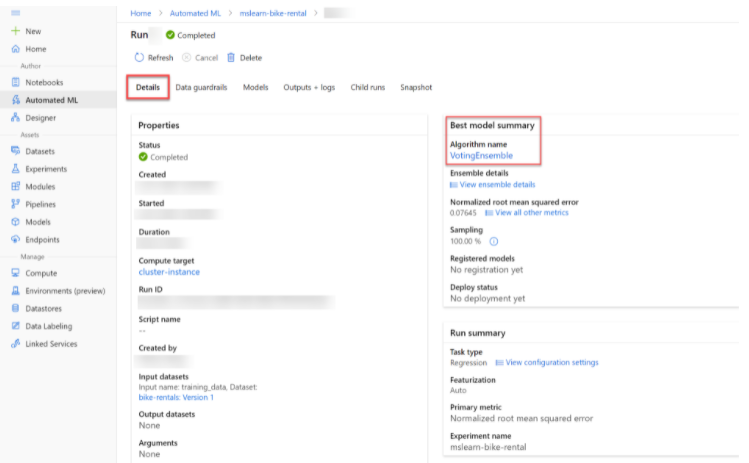

2. Select the **Algorithm name** for the best model to view its details. [Ayrıntılarını görüntülemek için en iyi model için Algoritma adını seçin.]

    The best model is identified based on the evaluation metric you specified, Normalized root mean squared error. [En iyi model, belirttiğiniz değerlendirme metriğine göre belirlenir, Normalleştirilmiş kök ortalama kare hatası.]

    A technique called cross-validation is used to calculate the evaluation metric. [Değerlendirme metriğini hesaplamak için çapraz doğrulama adı verilen bir teknik kullanılır.] After the model is trained using a portion of the data, the remaining portion is used to iteratively test, or cross-validate, the trained model. [Model, verilerin bir kısmı kullanılarak eğitildikten sonra, kalan kısım, eğitilen modeli yinelemeli olarak test etmek veya çapraz doğrulamak için kullanılır.] The metric is calculated by comparing the predicted value from the test with the actual known value, or label. [Metrik, testten tahmin edilen değer ile gerçek bilinen değer veya etiket karşılaştırılarak hesaplanır.]

    The difference between the predicted and actual value, known as the residuals, indicates the amount of error in the model. [Artıklar olarak bilinen tahmin edilen ve gerçek değer arasındaki fark, modeldeki hata miktarını gösterir.] The particular performance metric you used, normalized root mean squared error, is calculated by squaring the errors across all of the test cases, finding the mean of these squares, and then taking the square root. [Kullandığınız belirli performans metriği, normalleştirilmiş hatanın karekökü, tüm test senaryolarındaki hataların karesinin alınması, bu karelerin ortalamasının bulunması ve ardından karekökünün alınmasıyla hesaplanır.] What all of this means is that smaller this value is, the more accurate the model's predictions. [Tüm bunların anlamı, bu değer ne kadar küçükse, modelin tahminleri o kadar doğru olur.]

3. Next to the Normalized root mean squared error value, select **View all other metrics** to see values of other possible evaluation metrics for a regression model. [Normalleştirilmiş ortalama kare hata değerinin yanında, bir regresyon modeli için diğer olası değerlendirme metriklerinin değerlerini görmek için Diğer tüm metrikleri görüntüle'yi seçin.]

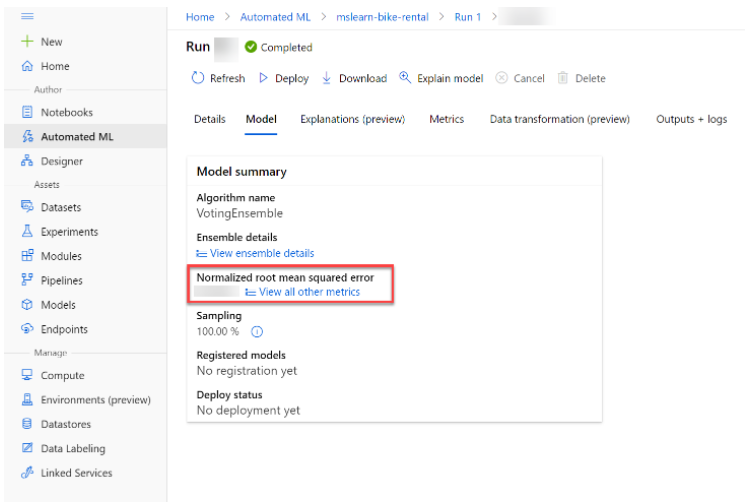

4. Select the **Metrics** tab and select the **residuals** and **predicted_true** charts if they are not already selected.

    Review the charts which show the performance of the model. [Modelin performansını gösteren çizelgeleri inceleyin.] The chart compares the predicted values against the true values, and shows the residuals, the differences between predicted and actual values, as a histogram. [Grafik, tahmin edilen değerleri gerçek değerlerle karşılaştırır ve artıkları, tahmin edilen ve gerçek değerler arasındaki farkları bir histogram olarak gösterir.]

    The **Predicted vs. [Öngörülen vs.] True** chart should show a diagonal trend in which the predicted value correlates closely to the true value. [Gerçek grafik, tahmin edilen değerin gerçek değerle yakından ilişkili olduğu çapraz bir eğilim göstermelidir.] The dotted line shows how a perfect model should perform. [Noktalı çizgi, mükemmel bir modelin nasıl performans göstermesi gerektiğini gösterir.] The closer the line of your model's average predicted value is to the dotted line, the better its performance. [Modelinizin ortalama tahmini değerinin çizgisi noktalı çizgiye ne kadar yakınsa, performansı o kadar iyi olur.] A histogram below the line chart shows the distribution of true values. [Çizgi grafiğin altındaki histogram, gerçek değerlerin dağılımını gösterir.]
    
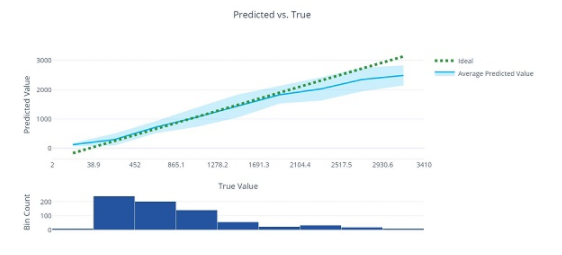

    The **Residual Histogram** shows the frequency of residual value ranges. [Artık Histogram, artık değer aralıklarının sıklığını gösterir.] Residuals represent variance between predicted and true values that can't be explained by the model, in other words, errors. [Artıklar, model tarafından açıklanamayan tahmini ve gerçek değerler arasındaki varyansı, diğer bir deyişle hataları temsil eder.] You should hope to see the most frequently occurring residual values clustered around zero. [Sıfır etrafında kümelenmiş en sık meydana gelen artık değerleri görmeyi ummalısınız.] You want to small errors with fewer errors at the extreme ends of the scale. [Ölçeğin uç noktalarında daha az hatayla küçük hatalar yapmak istiyorsunuz.]

5. Select the **Explanations** tab. [Açıklamalar sekmesini seçin.] Click on the arrows >> next to **Explanation ID** to expand the explanations list. [Açıklamalar listesini genişletmek için Açıklama Kimliği'nin yanındaki >> oklara tıklayın.] Select an explanation ID, select **View previous dashboard experience** on the right-hand side. [Bir açıklama kimliği seçin, sağ tarafta Önceki pano deneyimini görüntüle'yi seçin.] Then select **Global Importance**. [Ardından Global Önem'i seçin.] This chart shows how much each feature in the dataset influences the label prediction, like this: [Bu grafik, veri kümesindeki her bir özelliğin etiket tahminini ne kadar etkilediğini aşağıdaki gibi gösterir:]

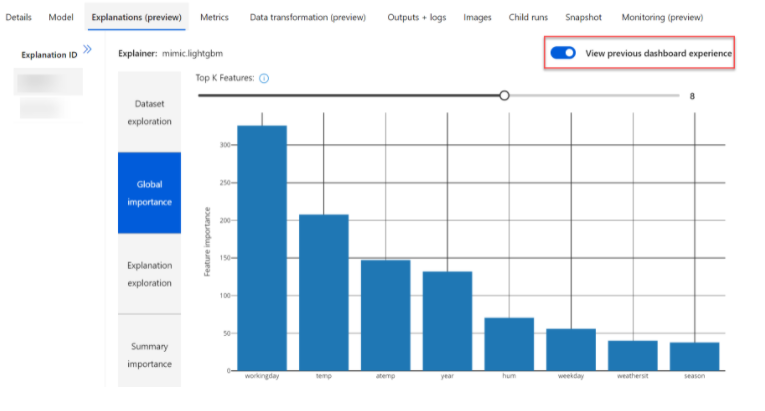